# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [62]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [63]:
iris = datasets.load_iris()
print(iris.DESCR)
X=pd.DataFrame(iris['data'],columns=iris['feature_names'])
X.head()

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [64]:
print(iris.keys())
print(iris['frame'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
None


In [65]:
# we only take the first two features. 
X=iris.data[:,:2]
print(X.shape)
Y=iris.target
print(Y.shape)

(150, 2)
(150,)


In [66]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [67]:
#建立Target欄位與資料
y=pd.DataFrame(iris.target,columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [68]:
#合併資料特徵欄位與目標欄位
iris_data=pd.concat([x,y],axis=1)
iris_data=iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data.head()

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [69]:
#只選擇目標為0與1的資料
iris_data=iris_data[(iris_data['target']<=1) & (iris_data['target']>=0)]
iris_data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [70]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(iris_data[['sepal length (cm)','petal length (cm)']],iris_data['target'],test_size=0.3)

In [71]:
print(X_train.head())
X_train.shape

    sepal length (cm)  petal length (cm)
45                4.8                1.4
49                5.0                1.4
20                5.4                1.7
55                5.7                4.5
50                7.0                4.7


(70, 2)

In [72]:
print(X_test.head())
X_test.shape

    sepal length (cm)  petal length (cm)
32                5.2                1.5
58                6.6                4.6
86                6.7                4.7
28                5.2                1.4
48                5.3                1.5


(30, 2)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [73]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col):
    #m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-np.mean(col[c]))/np.std(col[c])
    return df

In [74]:
#stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train))
arr_y_train = np.array(Y_train)
print(arr_x_train[:5])
arr_x_test= np.array(z_score(X_test))
arr_y_test = np.array(Y_test)
print(arr_x_test[:5])

[[-1.07492434 -1.03473899]
 [-0.76335207 -1.03473899]
 [-0.14020752 -0.82877198]
 [ 0.32715089  1.0935867 ]
 [ 2.35237065  1.23089804]]
[[-0.36082522 -0.89360839]
 [ 1.86780116  1.31664641]
 [ 2.02698875  1.38794495]
 [-0.36082522 -0.96490693]
 [-0.20163762 -0.89360839]]


## use sklearn

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.49       2.90714286]
[0.64190565 1.45654399]


In [76]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-1.07492434, -1.03473899],
       [-0.76335207, -1.03473899],
       [-0.14020752, -0.82877198],
       [ 0.32715089,  1.0935867 ],
       [ 2.35237065,  1.23089804]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [77]:
sc1 = StandardScaler().fit(X_test)
X_test_std = sc1.transform(X_test)
print(X_test_std[:5])

[[-0.36082522 -0.89360839]
 [ 1.86780116  1.31664641]
 [ 2.02698875  1.38794495]
 [-0.36082522 -0.96490693]
 [-0.20163762 -0.89360839]]


you can also use fit_transform method (i.e., fit and then transform)    

In [78]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc1.fit_transform(X_test)
print(X_train_std[:5])
print(X_test_std[:5])


[[-1.07492434 -1.03473899]
 [-0.76335207 -1.03473899]
 [-0.14020752 -0.82877198]
 [ 0.32715089  1.0935867 ]
 [ 2.35237065  1.23089804]]
[[-0.36082522 -0.89360839]
 [ 1.86780116  1.31664641]
 [ 2.02698875  1.38794495]
 [-0.36082522 -0.96490693]
 [-0.20163762 -0.89360839]]


In [79]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.0
std of X_train_std: 1.0


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.900535286071346
31.032113233975657


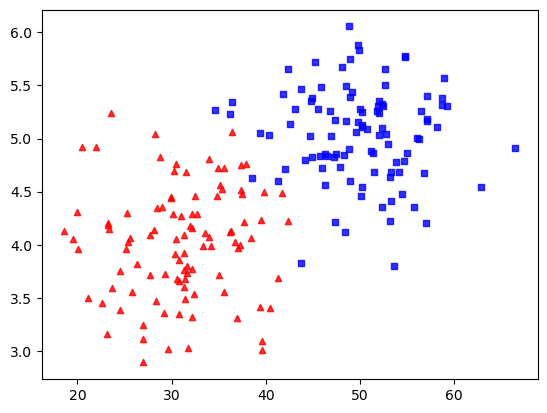

In [80]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [88]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

print(x_val.shape)
x_val=x_val.reshape(-1,1)
print(x_val)
print(x_val.shape)

(200,)
[[51.48390856]
 [48.99132318]
 [55.70314729]
 [57.02119859]
 [51.98768417]
 [51.87782219]
 [49.77724541]
 [53.25045043]
 [51.8555045 ]
 [47.48115892]
 [48.27170352]
 [49.15712347]
 [53.15784533]
 [55.05191345]
 [58.7349066 ]
 [50.27073332]
 [47.32276387]
 [44.93309122]
 [44.71899028]
 [54.70742464]
 [45.85100925]
 [53.20890906]
 [46.25919628]
 [43.10235763]
 [44.121559  ]
 [44.83618403]
 [48.51056375]
 [57.08243454]
 [56.47010305]
 [48.80037035]
 [46.50080052]
 [36.41708771]
 [53.29418342]
 [52.68371515]
 [50.26073003]
 [48.47475141]
 [57.11129612]
 [50.17521464]
 [42.38609561]
 [54.17842705]
 [48.89149801]
 [48.4642149 ]
 [59.24036027]
 [45.51105209]
 [51.14328349]
 [47.38197331]
 [52.96812075]
 [57.11087629]
 [54.7713243 ]
 [53.64505456]
 [54.77672684]
 [38.50542496]
 [34.65923357]
 [56.80733421]
 [49.76155841]
 [54.51502556]
 [41.27495249]
 [45.20934676]
 [48.94765341]
 [52.01080496]
 [58.22796497]
 [50.71999048]
 [62.86326909]
 [52.39905721]
 [53.78136552]
 [47.24215278]
 [5

In [91]:
def minmax_norm(X):
    return (X - X.min()) / ((X.max() - X.min()))

In [93]:
minmax_norm(x_val)

array([[0.68637918],
       [0.63432388],
       [0.77449401],
       [0.80202027],
       [0.69690006],
       [0.69460569],
       [0.65073713],
       [0.72327174],
       [0.69413961],
       [0.60278552],
       [0.6192953 ],
       [0.63778646],
       [0.72133777],
       [0.7608936 ],
       [0.83780945],
       [0.66104316],
       [0.59947759],
       [0.54957153],
       [0.54510023],
       [0.75369928],
       [0.56874138],
       [0.72240419],
       [0.57726598],
       [0.51133838],
       [0.53262344],
       [0.54754771],
       [0.62428367],
       [0.80329912],
       [0.79051116],
       [0.63033601],
       [0.58231166],
       [0.37172281],
       [0.72418506],
       [0.71143601],
       [0.66083425],
       [0.62353576],
       [0.80390187],
       [0.65904834],
       [0.49637992],
       [0.74265166],
       [0.63223913],
       [0.62331572],
       [0.84836537],
       [0.56164169],
       [0.67926554],
       [0.60071412],
       [0.71737555],
       [0.803

In [84]:
from sklearn.preprocessing import MinMaxScaler
x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.transform(x_val)[:10])

[66.50114395]
[[0.68637918]
 [0.63432388]
 [0.77449401]
 [0.80202027]
 [0.69690006]
 [0.69460569]
 [0.65073713]
 [0.72327174]
 [0.69413961]
 [0.60278552]]
